---
title: "Soundscapy"
subtitle: "A Python Package for Soundscape Assessment and Analysis"
author: 
  - name: "Andrew Mitchell"
    orcid: 0000-0003-0978-5046
    email: a.j.mitchell@ucl.ac.uk
    affiliation: Bartlett School of Sustainable Construction
institute: "University College London"
format:
  clean-revealjs: default
  # revealjs:
  #   theme: simple
  #   transition: slide
  #   slide-number: true
  #   preview-links: auto
  #   logo: images/LightLogoSmall.png
  #   footer: "INTER-NOISE 2024"
  #   css: custom.css
html-math-method: 
  method: mathjax
  url: "https://cdn.jsdelivr.net/npm/mathjax@3/es5/tex-mml-chtml.js"
date: 2024-08-26
bibliography: FellowshipRefs-biblatex.bib
execute:
  echo: true
  freeze: auto
  keep-ipynb: true
---

In [1]:
#| echo: false
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import warnings

warnings.simplefilter("ignore")

## Introduction {.smaller}

::: {.columns}
::: {.column width="50%"}
- Soundscape: holistic approach to acoustic environments
- ISO 12913 series (since 2018) provides standardized framework
- Challenges in consistent application of standards

::: {.fragment}
Soundscapy addresses these challenges:

- Open-source Python package
- Aligns with ISO 12913-3 guidelines
- Facilitates consistent, reproducible analysis
:::

:::
::: {.column width="50%"}
![ISO 12913-3 recommendations for soundscape analysis](images/ISO12913-3-screenshot.png)
:::
:::



::: {.notes}
Introduce the concept of soundscape and its holistic approach.
Mention the ISO 12913 series and its role in standardizing soundscape assessment.
Highlight the challenges in applying these standards consistently.
Introduce Soundscapy as a solution to these challenges.
:::

## Soundscapy: Origins and Purpose {.smaller}

::: {.columns}
::: {.column width="60%"}
- Developed during the Soundscape Indices (SSID) project
- Built on the SSID Protocol for data collection
- Utilizes the International Soundscape Database (ISD)

::: {.fragment}
- Key features:
  - Visualization using distributional methods
  - Psychoacoustic and acoustic analysis of binaural data
  - Optimized for large-scale data processing
:::

::: {.fragment}
### Simple to install
```bash
pip install soundscapy
```

In [2]:
import soundscapy as sspy

:::
:::
::: {.column width="40%"}
![Soundscapy Logo](images/LightLogo.png){.r-stretch}
:::
:::



::: {.notes}
Explain the origins of Soundscapy in the SSID project.
Highlight its connection to the SSID Protocol and the ISD.
Briefly introduce the key features, emphasizing its capabilities in visualization and data processing.
:::

## Soundscape Circumplex Model {.smaller}

::: {.columns}
::: {.column width="40%"}
- Proposed by @Axelsson2010principal
- Two orthogonal dimensions:
  - Pleasant-Annoying (x-axis)
  - Eventful-Uneventful (y-axis)
- Eight perceptual scales
- Adopted in ISO/TS 12913-2
:::
::: {.column width="60%"}

In [3]:
#| echo: false
sample_transform = {
    "RecordID": ["EX1", "EX2"],
    "pleasant": [4, 2],
    "vibrant": [4, 3],
    "eventful": [4, 5],
    "chaotic": [2, 5],
    "annoying": [1, 5],
    "monotonous": [3, 5],
    "uneventful": [3, 3],
    "calm": [4, 1],
}
sample_transform = pd.DataFrame().from_dict(sample_transform)
sample_transform = sample_transform.set_index("RecordID")

<PolarAxes: >

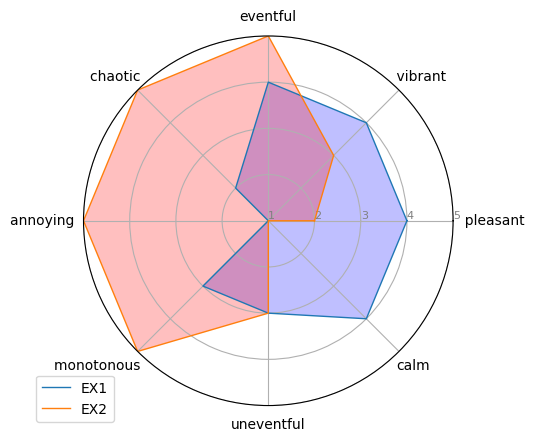

In [4]:
from soundscapy.plotting import likert
likert.paq_radar_plot(sample_transform)

:::
:::

::: {.notes}
Explain the Soundscape Circumplex Model in more detail.
Highlight its importance in standardizing soundscape assessment.
Mention its adoption in ISO/TS 12913-2 and its widespread use in research.
:::

## ISO Coordinates Calculation {.smaller}

::: {.columns}

::: {.column width="50%"}
- Implements equations from ISO 12913-3
- Transforms 8 PAQ responses into 2D coordinates
- Flexible input ranges (e.g., 1-5, 0-100)
- Supports different angle configurations

$$
P_{ISO} = \frac{1}{\lambda_{Pl}} \sum_{i=1}^{8} \cos{\theta_i} \cdot \sigma_i
$$ {#eq-isopl}

$$
E_{ISO} = \frac{1}{\lambda_{Pl}} \sum_{i=1}^{8} \sin{\theta_i} \cdot \sigma_i
$$ {#eq-isoev}

:::

::: {.column width="50%"}

In [5]:
# Load data from the ISD
data = sspy.isd.load()

# Apply built-in data quality checks
data, excl_data = sspy.isd.validate(data, allow_paq_na=False)

# Calculate the ISO Coordinates
data = sspy.surveys.add_iso_coords(data)

In [6]:
#| echo: false
view_data = sspy.surveys.return_paqs(data, incl_ids = False, other_cols = ['ISOPleasant', 'ISOEventful'])
view_data.head(5)

,PAQ1,PAQ2,PAQ3,PAQ4,PAQ5,PAQ6,PAQ7,PAQ8,ISOPleasant,ISOEventful
0,2.0,4.0,2.0,1.0,2.0,2.0,4.0,2.0,0.219670,-0.133883
1,2.0,4.0,4.0,4.0,4.0,4.0,1.0,1.0,-0.426777,0.530330
2,5.0,3.0,3.0,1.0,2.0,1.0,3.0,4.0,0.676777,-0.073223
3,5.0,3.0,3.0,1.0,2.0,2.0,3.0,4.0,0.603553,-0.146447
4,5.0,3.0,3.0,2.0,2.0,3.0,3.0,4.0,0.457107,-0.146447


:::

:::

::: {.notes}
Explain the purpose and functionality of the `calculate_iso_coords` function.
Highlight its alignment with ISO 12913-3 equations.
Emphasize its flexibility in handling different input ranges and angle configurations.
Mention how this function is central to Soundscapy's analysis capabilities.
:::

## Distribution-based Analysis {.smaller}

::: {.columns}
::: {.column width="50%"}
- Developed by @Mitchell2022How
- Represents the collective perception of a soundscape as a distribution, using kernel density estimation
- Provides far richer insight than point estimates
:::
::: {.column width="50%"}

::: {.r-stack}
::: {.fragment}

<Axes: title={'center': 'Camden Town Soundscape Distribution'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

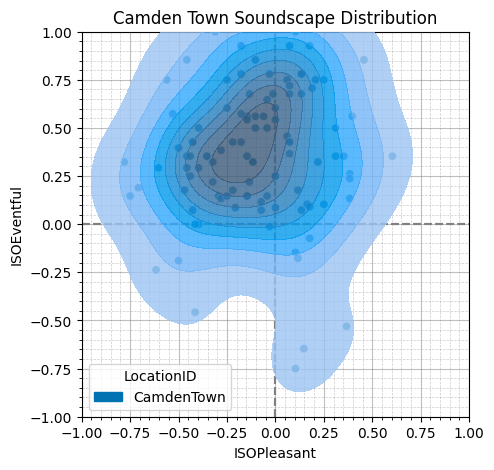

In [7]:
#| code-line-numbers: "|1|2|3,4,5"
sspy.plotting.density_plot(
  sspy.isd.select_location_ids(data, "CamdenTown"),
  title="Camden Town Soundscape Distribution",
  hue="LocationID",
  incl_scatter=True
)

:::

::: {.fragment}

<Axes: title={'center': 'Comparison between two soundscapes'}, xlabel='ISOPleasant', ylabel='ISOEventful'>

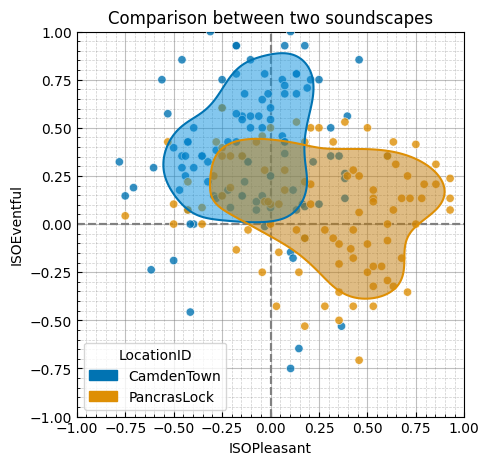

In [8]:
#| code-line-numbers: "2,7"
sspy.plotting.density_plot(
  sspy.isd.select_location_ids(data, ("CamdenTown", "PancrasLock")),
  title = "Comparison between two soundscapes",
  hue = "LocationID",
  incl_scatter=True,
  incl_outline=True,
  simple_density=True,
)

:::

::: {.fragment}

In [9]:
from soundscapy.plotting import Backend
import plotly.io as pio

sspy.plotting.scatter_plot(
  sspy.isd.select_location_ids(data, ("RegentsParkJapan")),
  backend = Backend.PLOTLY,
  title = "Regents Park Japanese Garden Soundscape",
)

/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/soundscapy/plotting/backends.py:246: UserWarning: PlotlyBackend is very experimental and not fully implemented.
  warnings.warn(


:::

:::
:::
:::

::: {.notes}
This distribution-based visualisation and analysis clearly shows three important
characteristics of the soundscape perception of a group or location:
1. The distribution across both pleasantness and eventfulness, including the central tendency, the
dispersion, and any skewness in the response.
2. The general shape of the soundscape within the circumplex space - in this case, Pancras Lock is
mostly in the pleasant half, with a slight skew towards eventfulness.
Proceedings of INTER-NOISE 2024
3. The degree of agreement about the soundscape perception among the sample.
In addition to these visualisations, Soundscapy provides functions for calculating some basic
statistics about the distribution of responses, such as the mean, median, and standard deviation,
as well as metrics inspired by reporting from noise annoyance studies, such as the percentage of
respondents who rated the soundscape as ‘pleasant’ or ‘eventful’.
:::

## Databases Integration {.smaller}

::: {.columns}
::: {.column width="50%"}
- International Soundscape Database (ISD)
  - 2,706 recordings
  - 3,590 survey responses
  - 6 cities across Europe and China
- Soundscape Attributes Translation Project (SATP)
  - 19,089 responses
  - 708 participants
  - 19 languages
- ARAUS
  - Currently under development
:::
::: {.column width="50%"}

In [10]:
# Load ISD data
isd_data = sspy.isd.load()

# Load SATP data
import soundscapy.databases.satp as satp
satp_data = satp.load_zenodo()

print(f"ISD shape: {isd_data.shape}")
print(f"SATP shape: {satp_data.shape}")

ISD shape: (3589, 142)
SATP shape: (17441, 16)


:::
:::

::: {.notes}
Explain the significance of the integrated databases.
Highlight the ease of loading and working with these datasets in Soundscapy.
Mention the potential for cross-cultural and multi-lingual soundscape studies.
:::

## Psychoacoustic Analysis {.smaller}

::: {.columns}
::: {.column width="50%"}
- Integration with multiple libraries:
  - Python Acoustics
  - scikit-maad
  - MoSQITo
- Wide range of metrics:
  - SPL ($L_{Zeq}$, $L_{Aeq}$, $L_{Ceq}$)
  - Loudness (N)
  - Sharpness (S)
  - Roughness (R)
  - Many more...
:::
::: {.column width="50%"}

In [11]:
from soundscapy.audio.analysis_settings import MetricSettings
from soundscapy.audio import Binaural

b = Binaural.from_wav("data/CT101.wav")

loudness_settings = MetricSettings(
    run = True,
    statistics = (5, 50, 'avg', 'max'),
    func_args = {'field_type': 'free'},
    label="N",
)

b.mosqito_metric('loudness_zwtv', metric_settings=loudness_settings).round(2)

N_5   N_50  N_avg  N_max
Recording Channel                            
CT101     Left     28.85  23.18  22.69  36.19
          Right    30.84  23.94  23.78  37.77

:::
:::

::: {.notes}
Highlight the comprehensive psychoacoustic analysis capabilities.
Mention the integration with established libraries.
Emphasize the simplicity of performing complex analyses.
Discuss the importance of these metrics in soundscape assessment.
:::

## Batch Processing and Performance {.smaller}

::: {.columns}

::: {.column width="50%"}

In [12]:
#| echo: false
import time

start = time.perf_counter()

In [13]:
from soundscapy.audio import AudioAnalysis

wav_folder = Path("data")

# Initialize the AudioAnalysis object with default settings
analysis = AudioAnalysis()

# Analyse a folder of recordings
folder_results = analysis.analyze_folder(wav_folder, calibration_file="data/Levels.json")

# Print the results
folder_results.head()

Analyzing files:   0%|          | 0/20 [00:00<?, ?it/s]

/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/acoustics/_signal.py:175: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  self *= factor
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/acoustics/_signal.py:175: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  self *= factor
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/acoustics/_signal.py:175: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  self

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow ca

/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/numpy/_core/_methods.py:52: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return umr_sum(a, axis, dtype, out, keepdims, initial, where)
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/acoustics/standards/iso_tr_25417_2007.py:125: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  return 10.0 * np.log10(sound_exposure(pressure, fs, axis=axis) / reference_sound_exposure)
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/acoustics/standards/iso

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow ca

/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  zero_crosses = np.nonzero(np.diff(s > 0))[0]
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:1452: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  a = op(a[slice1], a[slice2])
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar ar

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.



/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  zero_crosses = np.nonzero(np.diff(s > 0))[0]
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:1452: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  a = op(a[slice1], a[slice2])
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar ar

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.


/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  zero_crosses = np.nonzero(np.diff(s > 0))[0]
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:1452: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  a = op(a[slice1], a[slice2])
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar ar

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.


/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  zero_crosses = np.nonzero(np.diff(s > 0))[0]
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:1452: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  a = op(a[slice1], a[slice2])
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar ar

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.


/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  zero_crosses = np.nonzero(np.diff(s > 0))[0]
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:1452: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  a = op(a[slice1], a[slice2])
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar ar

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.


/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  zero_crosses = np.nonzero(np.diff(s > 0))[0]
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:1452: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  a = op(a[slice1], a[slice2])
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar ar

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.


/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  zero_crosses = np.nonzero(np.diff(s > 0))[0]
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:1452: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  a = op(a[slice1], a[slice2])
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar ar

[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow calculation. To fulfill the standard requirements fs should be >=48 kHz.
[Warning] Signal resampled to 48 kHz to allow ca

/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  zero_crosses = np.nonzero(np.diff(s > 0))[0]
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/numpy/lib/_function_base_impl.py:1452: DeprecationWarning: __array_wrap__ must accept context and return_scalar arguments (positionally) in the future. (Deprecated NumPy 2.0)
  a = op(a[slice1], a[slice2])
/Users/mitch/Library/CloudStorage/OneDrive-UniversityCollegeLondon/_Fellowship/Papers - Drafts/C2402_InterNoise_Soundscapy/.venv/lib/python3.11/site-packages/maad/features/temporal.py:132: DeprecationWarning: __array_wrap__ must accept context and return_scalar ar

LAeq     LAeq_5    LAeq_10    LAeq_50    LAeq_90  \
Recording Channel                                                          
CT108     Left     70.589507  74.558756  73.843937  69.525786  64.824693   
          Right    70.112106  73.867805  73.206158  69.500252  63.767889   
CT107     Left     68.044340  72.248420  71.395037  66.199040  62.448782   
          Right    66.957640  71.154329  69.520778  65.567530  62.737097   
CT101     Left     68.875703  72.257301  71.154342  68.113339  63.375091   

                     LAeq_95   LAeq_min   LAeq_max  LAeq_kurt  LAeq_skew  ...  \
Recording Channel                                                         ...   
CT108     Left     64.187174  62.768378  75.729902  -0.672714  -0.097663  ...   
          Right    63.381380  62.296449  76.077951  -1.033197  -0.220893  ...   
CT107     Left     61.533067  60.039913  76.177939  -0.535311   0.386803  ...   
          Right    62.105325  59.427035  73.699931  -0.229152   0.490734  ...   
CT101     Left     62.366533  60.560166  77.382651   0.272011  -0.013877  ...   

                       TFSD  H_Havrda   H_Renyi  H_pairedShannon      H_gamma  \
Recording Channel                                                               
CT108     Left     0.601720  0.315433  1.462151         3.302710  1379.622896   
          Right    0.597461  0.312580  1.388225         3.167239  1171.735670   
CT107     Left     0.596434  0.306238  1.254894         3.044223  1338.067296   
          Right    0.600826  0.301908  1.180762         2.863631   875.440353   
CT101     Left     0.596465  0.306220  1.254552         2.981413  1004.342366   

                   H_GiniSimpson      RAOQ       AGI  ROItotal  ROIcover  
Recording Channel                                                         
CT108     Left          0.816123  0.017529  1.460654        22  0.849617  
          Right         0.799022  0.013242  1.623013         5  1.254925  
CT107     Left          0.770212  0.014416  1.821029        31  3.092858  
          Right         0.747898  0.008257  1.578739        45  2.396588  
CT101     Left          0.767638  0.012133  1.502836        38  1.794776  

[5 rows x 131 columns]

In [22]:
#| echo: false
stop = time.perf_counter()
print(f"Processed in {stop - start:0.2f} seconds")
print(f"Results shape: {folder_results.shape}")

Processed in 918.23 seconds
Results shape: (40, 131)


:::
::: {.column width="50%"}
- Unified output format
- Parallel processing capabilities
- Significant performance improvements
- Ideal for large-scale soundscape studies
:::
:::

::: {.notes}
Explain the benefits of batch processing in Soundscapy.
Highlight the performance improvements, especially for large datasets.
Discuss how this facilitates large-scale soundscape studies and practical applications.
:::

## Customization and Flexibility {.smaller}

::: {.columns}
::: {.column width="50%"}
- Customizable analysis settings
- Support for various data formats
- Extensible architecture for adding new metrics
- Integration with popular data science tools (pandas, matplotlib)
:::
::: {.column width="50%"}
```{{python}}
# Customize analysis settings
custom_settings = sspy.AnalysisSettings.from_yaml("custom_settings.yaml")

# Add a new metric
@sspy.register_metric
def custom_metric(signal):
    # Implement custom metric calculation
    pass

# Use with pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Example visualization
results_df = pd.DataFrame(results)
plt.figure(figsize=(10, 6))
plt.scatter(results_df['Loudness'], results_df['Sharpness'])
plt.xlabel('Loudness (sone)')
plt.ylabel('Sharpness (acum)')
plt.title('Loudness vs Sharpness')
plt.show()
```
:::
:::

::: {.notes}
Discuss the flexibility of Soundscapy in terms of customization.
Highlight how it can be integrated into existing workflows.
Mention the potential for extending the package with new metrics or analysis methods.
:::

## References